In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv

##  Twitch is an interactive livestreaming service for content spanning gaming, entertainment, sports, music, and more. 

Twitch streamers make money on subscriptions when people pay to watch them play.
First we will graph ttl viwership to this website from 2016 to 2023.


In [120]:

# Open and read csv
twitch_ttl = pd.read_csv("twitch ttl platform viewers.csv")
twitch_ttl

    

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio,DATE
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08,1/1/2016
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98,2/1/2016
2,2016,3,490669308,660389,1591551,7390957,20271,12234,28.92,3/1/2016
3,2016,4,377975447,525696,1775120,6869719,16791,12282,28.80,4/1/2016
4,2016,5,449836631,605432,1438962,7535519,19394,12424,28.85,5/1/2016
...,...,...,...,...,...,...,...,...,...,...
82,2022,11,1694262814,2356415,5362892,21744817,88195,41058,26.84,11/1/2022
83,2022,12,1674092138,2253152,3866814,21753674,84728,41548,27.00,12/1/2022
84,2023,1,1866962462,2512735,5593050,24429476,93349,43611,27.44,1/1/2023
85,2023,2,1712025798,2551454,5364876,22482367,96466,42440,26.58,2/1/2023


Pull January Stats out for each Year

In [121]:
twitch_Jan =twitch_ttl.loc[(twitch_ttl["Month"] == 1)]
twitch_Jan
#Good_Weather_df = city_data_df.loc[(city_data_df["Country"] == 'US') &(city_data_df["Cloudiness"] == 0)&(city_data_df["Humidity"] < 50)]


,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio,DATE
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08,1/1/2016
12,2017,1,601251200,809220,2284184,8672879,24081,14841,28.07,1/1/2017
24,2018,1,720220030,969340,2315343,11222734,33580,18309,26.02,1/1/2018
36,2019,1,949050474,1277322,2278352,17042119,55853,19995,24.38,1/1/2019
48,2020,1,1010010231,1359367,2400513,15053038,52875,21249,25.98,1/1/2020
60,2021,1,2173794168,2925698,6516666,25614207,119448,34551,25.03,1/1/2021
72,2022,1,2162446961,2910426,5674002,27591148,102254,41348,28.61,1/1/2022
84,2023,1,1866962462,2512735,5593050,24429476,93349,43611,27.44,1/1/2023


### Twitch Hour Watched TTL from 2016 - 2023 (Jan) 

The r-squared is: 0.8162284066523569


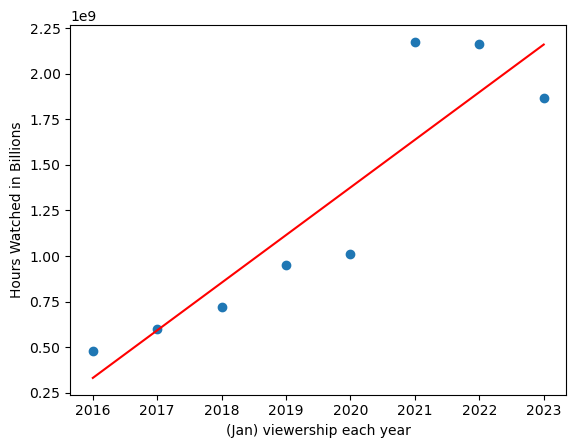

In [122]:
x_values = twitch_Jan['year']
y_values = twitch_Jan['Hours_watched']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('(Jan) viewership each year')
plt.ylabel('Hours Watched in Billions')
print(f"The r-squared is: {rvalue**2}")
plt.show()


## Twitch Streams available TTL from 2016 - 2023 (Jan) 

The r-squared is: 0.8763488566740066


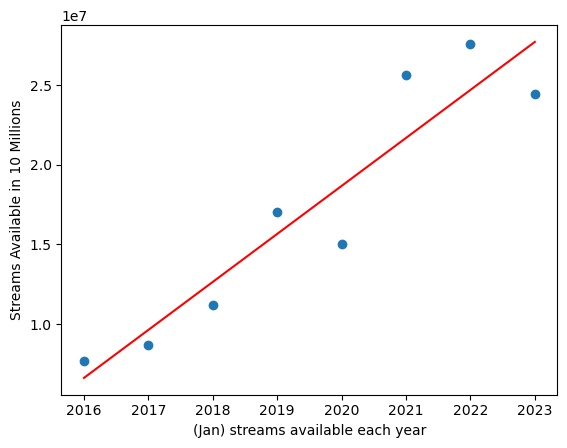

In [123]:
x_values = twitch_Jan['year']
y_values = twitch_Jan['Streams']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('(Jan) streams available each year')
plt.ylabel('Streams Available in 10 Millions')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Clearly Twitch viewership is up
Now we analyize the Hours watched by game. 

In [124]:
twitch_by_game = pd.read_csv("Twitch viewrs by game.csv",encoding='cp1252')
twitch_by_game


,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
17395,196,PokÃ©mon Community Game,3,2023,626465,34435,2048,73,1368,843,46,18.19
17396,197,Veiled Experts,3,2023,621189,9266,27928,338,1996,836,12,67.04
17397,198,The Godfather,3,2023,615938,286,58739,4,61,828,0,2153.63
17398,199,RuneScape,3,2023,612387,26245,3330,70,2508,824,35,23.33


Graph Hours watched for top 10 Games 2016 

In [166]:
# try to create new data frame of top ten games for each yr(Jan). First need to reduce ttl list to only top 10 games in Jan
All_Top_10 = twitch_by_game.loc[(twitch_by_game["Rank"] < 11) & (twitch_by_game["Month"] == 1) & (twitch_by_game["Year"] > 2015)]
All_Top_10
#All_Top_10.to_csv("Top10.csv")
# create datfram with only games row
All_Top_10.set_index('Year')

Games_df = All_Top_10[['Game']].copy()
#Games_df
#Games_df.to_csv("Games.csv")
#Drop all duplicate names
ATT = All_Top_10.set_index('Year')
ATT

,Rank,Game,Month,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
Year,,,,,,,,,,,
2016,1,League of Legends,1,94377226,1362044,530270,2903,129172,127021,1833,69.29
2016,2,Counter-Strike: Global Offensive,1,47832863,830105,372654,2197,120849,64378,1117,57.62
2016,3,Dota 2,1,45185893,433397,315083,1100,44074,60815,583,104.26
2016,4,Hearthstone,1,39936159,235903,131357,517,36170,53749,317,169.29
2016,5,Call of Duty: Black Ops III,1,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...
2023,6,Minecraft,1,72872812,1741344,684097,4833,371151,98079,2343,41.85
2023,7,Dota 2,1,43317513,628986,238148,1544,51212,58300,846,68.87
2023,8,Fortnite,1,42715772,4040480,268831,10921,810984,57490,5438,10.57


In [167]:
#Top 10 2015 - 2023
#Drop all duplicate names
Games = Games_df.drop_duplicates(subset='Game', keep='first')
Games



,Game
0,League of Legends
1,Counter-Strike: Global Offensive
2,Dota 2
3,Hearthstone
4,Call of Duty: Black Ops III
5,Minecraft
6,World of Warcraft
7,Z1: Battle Royale
8,Talk Shows & Podcasts
9,FIFA 16


In [127]:

Games_updated = pd.read_csv("Games.csv",encoding='cp1252')
#remove non e-sport game
Games_updated1 = Games_updated.loc[(Games_updated["Game"] != "Just Chatting") ]
#set games as index
G = Games_updated1.set_index('Game')
G

,2019,2020,2021,2022,2023
Game,,,,,
Fortnite,126502656,53731549,101306583,70296392,42715772
League of Legends,98976171,99657869,170781975,184282005,126494155
Dota 2,46512393,44025208,39545934,44366090,43317513
Counter-Strike: Global Offensive,30778297,33893286,60899705,40012823,39153067
PLAYERUNKNOWN'S BATTLEGROUNDS,29852076,18973733,11953142,0,0
Hearthstone,24477856,21222953,24208283,23783202,14337831
Overwatch,22499093,14476204,15430328,8979640,0
FIFA 19,18618028,0,0,0,0
World of Warcraft,18179362,27563181,44718092,22633405,34357942


## Highest viewers twitch streaming from 2019 to 2023

<Axes: xlabel='Game'>

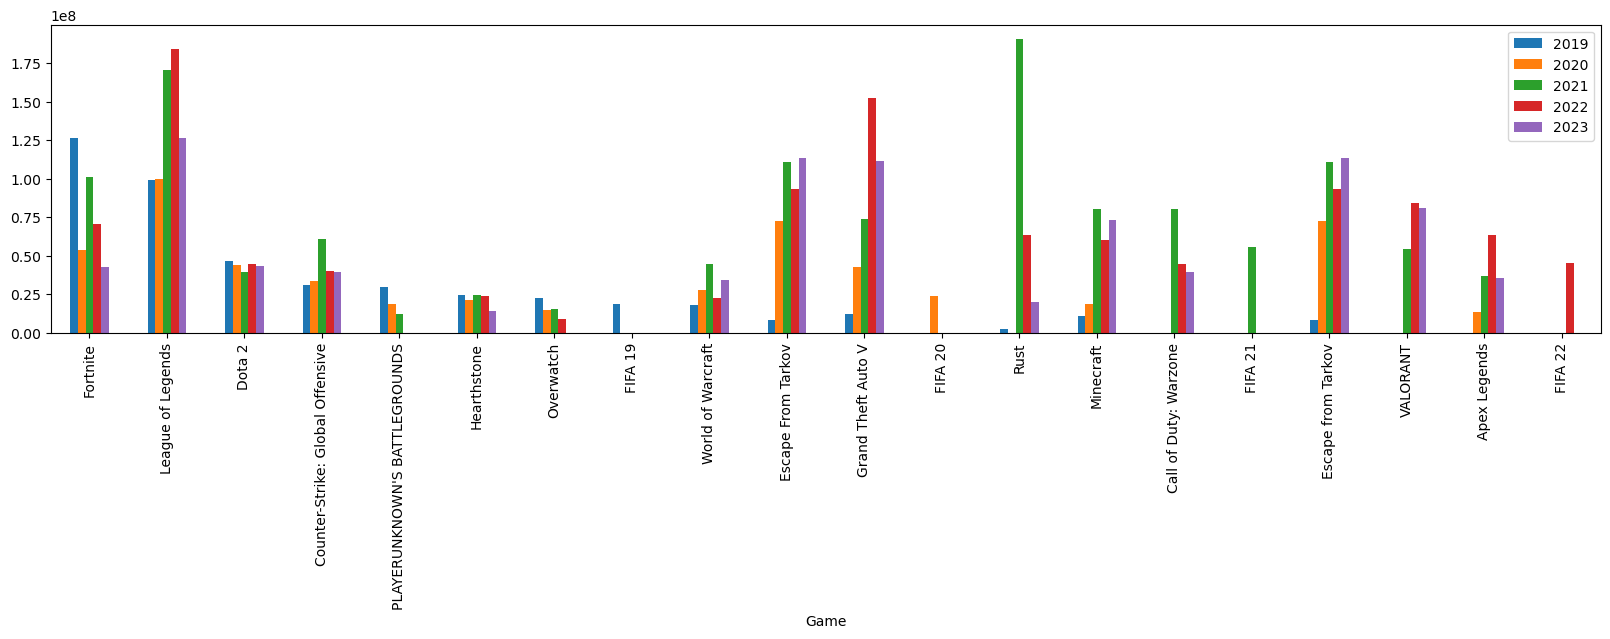

In [128]:

G.plot(kind="bar", figsize=(20,4))


## Open highest earning players create a graph to compare

In [129]:
Earnings = pd.read_csv("Highest_earning_players.csv")
Earnings


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [139]:
Game_earnings = Earnings.groupby(['Game'])['TotalUSDPrize'].sum().sort_values(ascending=True)
Game_earnings1 = pd.DataFrame(Game_earnings)
Game_earnings1

#Game_earnings.plot(x='Game', y='TotalUSDPrize', kind='bar')
                 



,TotalUSDPrize
Game,
Arena of Valor,8.333952e+06
Heroes of the Storm,1.178045e+07
Overwatch,1.234781e+07
PUBG,1.244196e+07
Hearthstone,1.333564e+07
Starcraft II,2.537982e+07
League of Legends,3.504348e+07
Fortnite,4.340937e+07
Counter-Strike: Global Offensive,5.654192e+07


<Axes: xlabel='Game'>

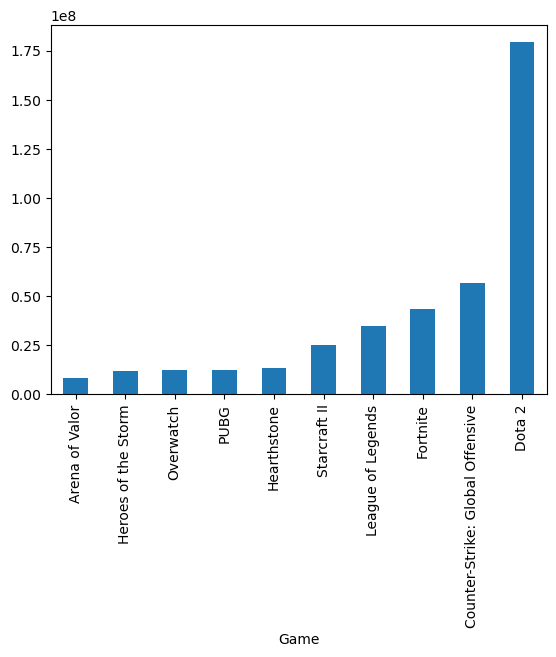

In [140]:
Game_earnings.plot(x='Game', y='TotalUSDPrize', kind='bar')

## Merging Twitch data Highest viewership with TTL USD prizes E-Sports to find best games to play for money

In [159]:
#Pull out the previous years
G1 = Games_updated1[['Game','2023']].copy()
#merge new 2023 twitch subscription numbers with E-Sport ttl prize money
G2 = pd.merge(G1,Game_earnings1, on ='Game') 
#rename 2023 column
G2.rename(columns = {'2023':'2023 Twitch viewership'}, inplace = True)
# Place Game as Index
G3 = G2.set_index('Game')
G3

,2023 Twitch viewership,TotalUSDPrize
Game,,
Fortnite,42715772,4.340937e+07
League of Legends,126494155,3.504348e+07
Dota 2,43317513,1.791788e+08
Counter-Strike: Global Offensive,39153067,5.654192e+07
Hearthstone,14337831,1.333564e+07
Overwatch,0,1.234781e+07


## Current top games to make monet on twitch and also top 10 highest ttl payout in tournaments

<Axes: xlabel='Game'>

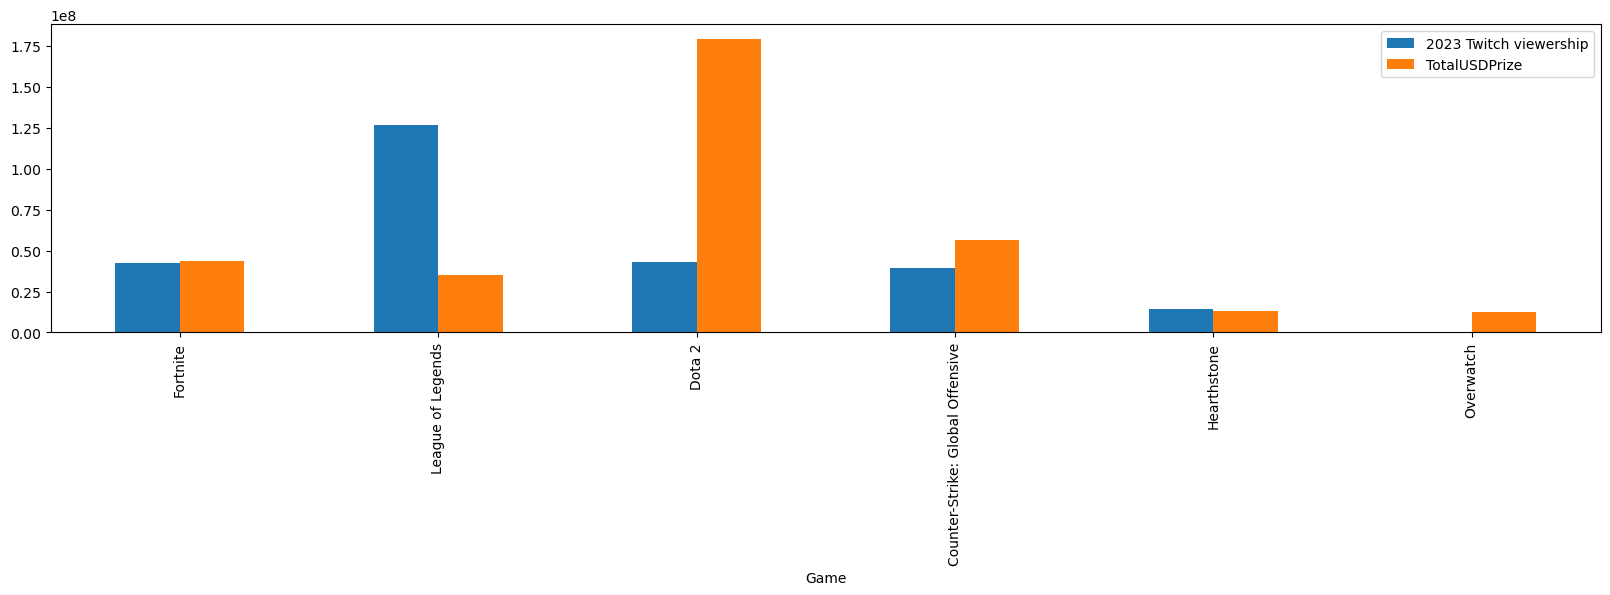

In [161]:
G3.plot(kind="bar", figsize=(20,4))